In [11]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

>Reading the csv file 

In [12]:
data = pd.read_csv('/Users/ramanurishita/Downloads/tips (data for regression problem).csv')


In [13]:
import warnings

In [14]:
warnings.filterwarnings('ignore')

>Displaying first 5 data of the data sheet

In [15]:
np.random.seed(0) 

In [16]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
data.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [18]:
data.shape

(244, 7)

In [19]:
print("Number of rows", data.shape[0])
print("Number of columns", data.shape[1])

Number of rows 244
Number of columns 7


In [20]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [21]:
# get the number of missing data points per column
missing_values_count =data.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [22]:
# how many total missing values do we have?
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0


As we can see, we have no missing values

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [24]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [25]:
# Dividing the columns into categories and numericals data types
# Initialize empty lists: cat for categorical columns and num for numerical columns.
# Iterate over each column in the DataFrame:
# Check the number of unique values in the column:
# Classify the column based on the number of unique values:
# 1. If the column has more than 10 unique values, it is considered numerical and appended to the num list.
# 2. If the column has 10 or fewer unique values, it is considered categorical and appended to the cat list.

In [26]:
   
cat=[]
num=[]
for column in data.columns:
    if data[column].nunique()>10:
        num.append(column)
    else:
        cat.append(column)
        
# num.append(column) is used in the context of lists in Python. 
# It means that the value stored in the variable column is being added to the end of the list 

In [27]:
cat

['sex', 'smoker', 'day', 'time', 'size']

In [28]:
num

['total_bill', 'tip']

In [29]:
identifier=[]
date_time=[]

for column in data.columns:
    if column in ['Invoice ID', 'Date', 'Time']:  # Exclude these columns
        identifier.append(column)
    elif pd.api.types.is_numeric_dtype(data[column]):
        if data[column].nunique() == data.shape[0]:
            identifier.append(column)  # Treat as identifier since all values are unique
        elif data[column].nunique() <= 10:
            cat.append(column)  # Treat as categorical due to few unique values
        else:
            num.append(column)  # Treat as numerical
    elif pd.api.types.is_datetime64_any_dtype(data[column]):
        date_time.append(column)  # Treat as date/time
    else:
        cat.append(column)  # Non-numeric, non-date columns are categorical

# Print the categorized lists
print("Categorical columns:", cat)
print("Numerical columns:", num)
print("Date/Time columns:", date_time)
print("Identifier columns:", identifier)

Categorical columns: ['sex', 'smoker', 'day', 'time', 'size', 'sex', 'smoker', 'day', 'time', 'size']
Numerical columns: ['total_bill', 'tip', 'total_bill', 'tip']
Date/Time columns: []
Identifier columns: []


In [30]:
# Lists to store different types of columns
cat = []        # Categorical columns
num = []        # Numerical columns
identifier = [] # Columns to exclude from cat/num (e.g., Invoice ID, Date, Time)

# Columns to exclude from categorical or numerical classification
exclude = ['Invoice ID', 'Date', 'Time']

# Loop through each column in the dataset
for column in data.columns:
    if column in exclude:
        identifier.append(column)  # Add to identifier list if it's in the exclude list
    elif pd.api.types.is_numeric_dtype(data[column]):
        if data[column].nunique() > 10:
            num.append(column)  # Add to numerical list if it has more than 10 unique values
        else:
            cat.append(column)  # Otherwise, treat it as categorical
    else:
        cat.append(column)  # Non-numeric columns are treated as categorical

# Print out the categorized lists
print("Categorical columns:", cat)
print("Numerical columns:", num)
print("Identifier columns:", identifier)
    
    
    

Categorical columns: ['sex', 'smoker', 'day', 'time', 'size']
Numerical columns: ['total_bill', 'tip']
Identifier columns: []


# Data Preprocessing

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
encoded_data = data.copy()
label_encoders = {}
for column in ['sex', 'smoker', 'day', 'time']:
    le = LabelEncoder()
    encoded_data[column] = le.fit_transform(encoded_data[column])
    label_encoders[column] = le 

# Data Analysis

            total_bill       tip      size
total_bill    1.000000  0.989443  0.987291
tip           0.989443  1.000000  0.999883
size          0.987291  0.999883  1.000000



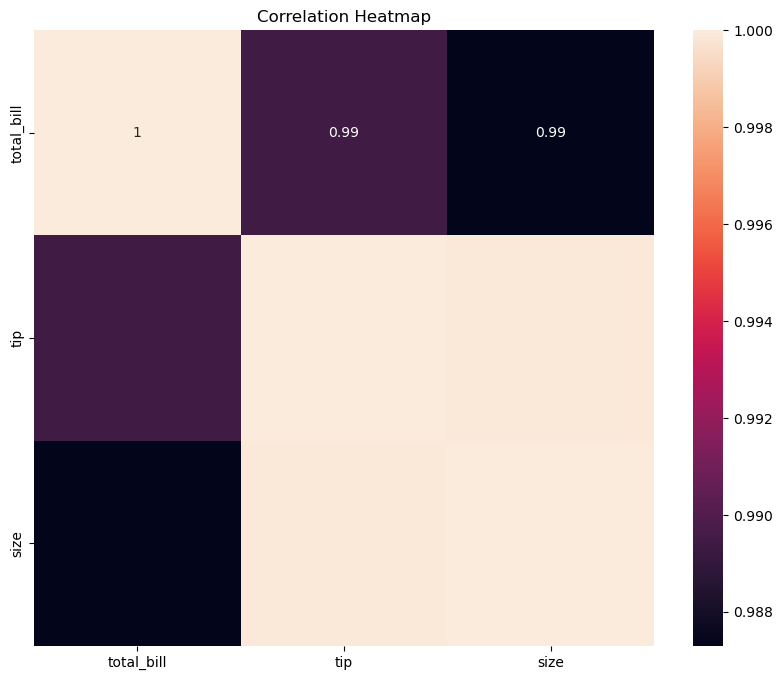

In [33]:
correlation_matrix = data.describe().corr()
print(correlation_matrix)
print()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

#### Observation:

The correlation coefficient between total_bill and tip is high, indicating a strong positive relationship. This means that as the total bill increases, the tip amount also tends to increase.

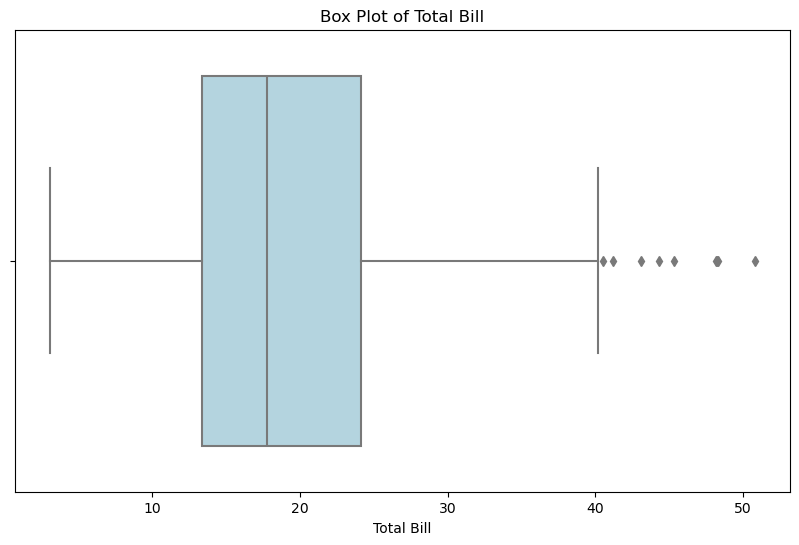

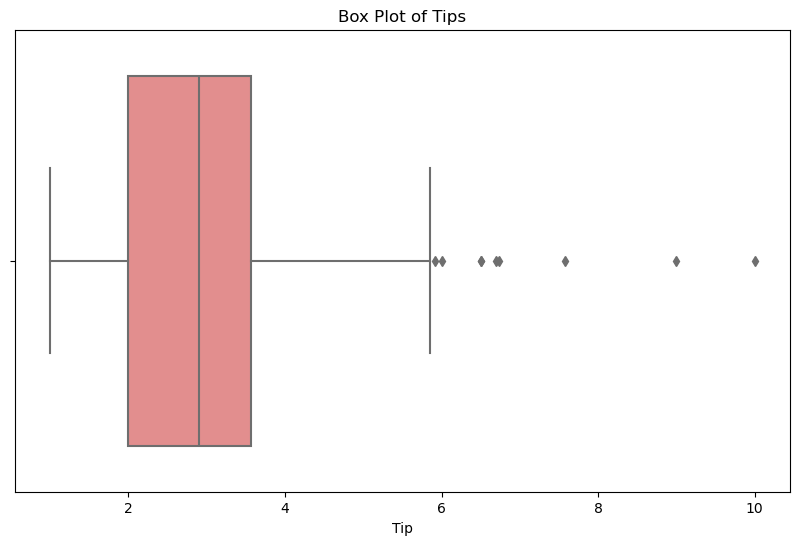

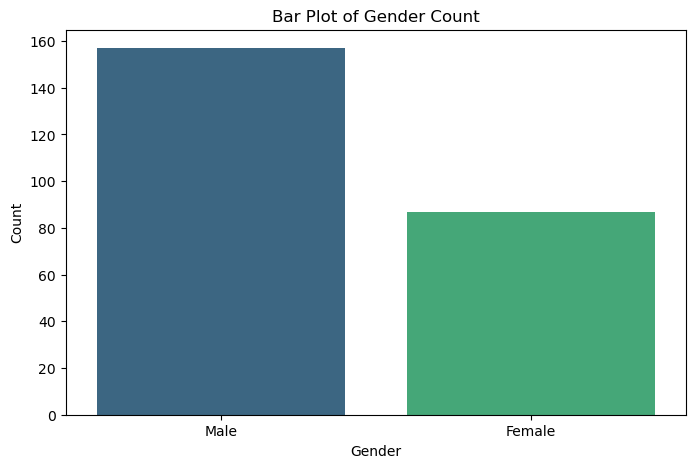

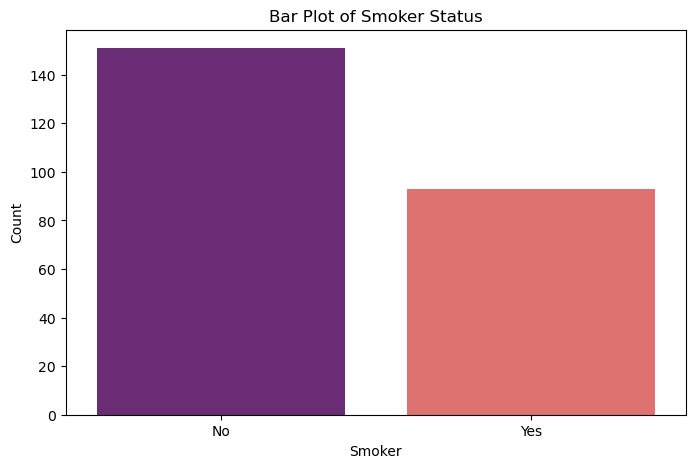

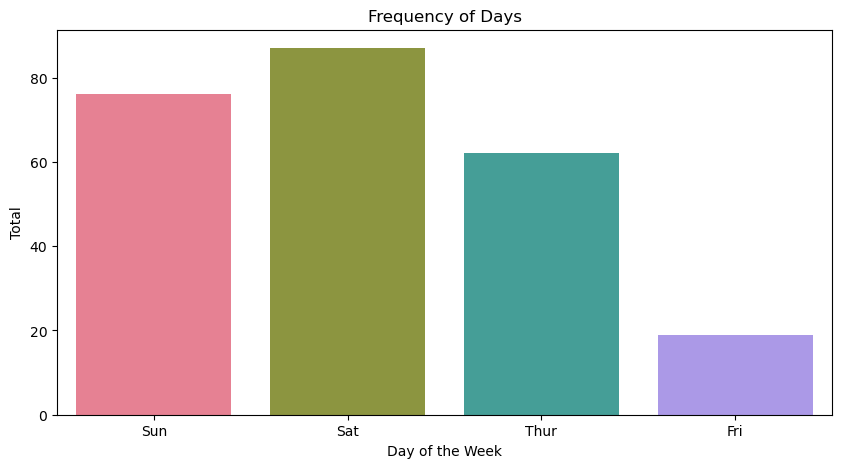

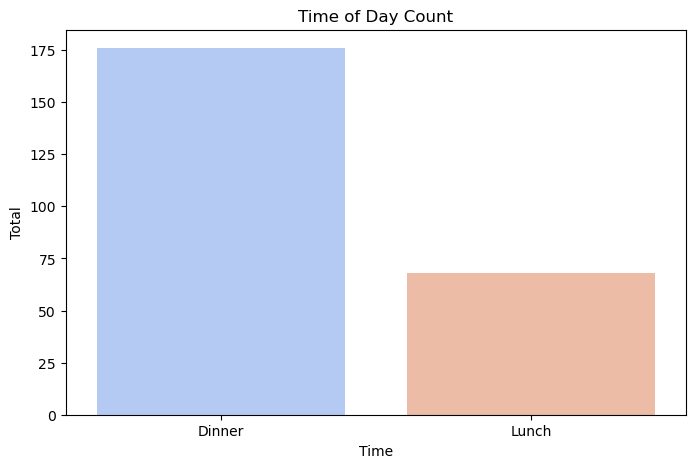

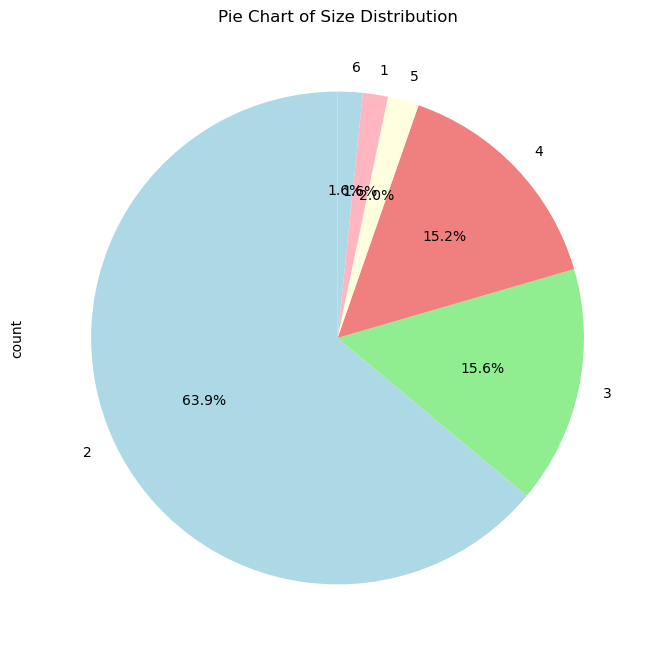

In [34]:
#box plot for total_bill and tip
#bar plot for sex and smokers
#countplot for days and time
#piechart for size

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['total_bill'], color='lightblue')
plt.title('Box Plot of Total Bill')
plt.xlabel('Total Bill')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['tip'], color='lightcoral')
plt.title('Box Plot of Tips')
plt.xlabel('Tip')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x=data['sex'].value_counts().index, y=data['sex'].value_counts().values, palette='viridis')
plt.title('Bar Plot of Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x=data['smoker'].value_counts().index, y=data['smoker'].value_counts().values, palette='magma')
plt.title('Bar Plot of Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='day', data=data, palette='husl')
plt.title('Frequency of Days')
plt.xlabel('Day of the Week')
plt.ylabel('Total')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='time', data=data, palette='coolwarm')
plt.title('Time of Day Count')
plt.xlabel('Time')
plt.ylabel('Total')
plt.show()

plt.figure(figsize=(8, 8))
data['size'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink'],
    startangle=90
)
plt.title('Pie Chart of Size Distribution')
plt.show()



### Conclusions:

1. Total Bill:

   -> The total_bill distribution shows potential outliers: which could represent unusually high or low bills. : these outliers could suggest special occasions such as a party or special family dinners.
   -> The moderate range of variability given by IQR is suggesting different spending behaviors among customers.


2. Tip:
 
   -> The tip box plot also displays outliers, which indicates a few generous tips that were given.
   -> IQR shows that most tips fall within a certain range, with the median line showing the most common tip value which is about 2.8 to 3.

3. Sex and Smoker:
 
   -> The plot shows that male tip more than female: this could be because male usually earn more than female and visit more than them.
   -> The smoker bar plot shows that non-smokers tip more.

4. Day:
 
   ->According to the plot: Saturday most people visit, it may be beacuse of it being weekend day and due to the fact that Sunday is usually a travel day while Saturday is dinning day.

5. Time:

   ->People who come in for dinner are more inclined to tip: this could be because due to conventional office timings people generally don't come during lunch and are'nt rushed during dinner.

6. Size:

   -> Maximum visited and tipped size is 2.


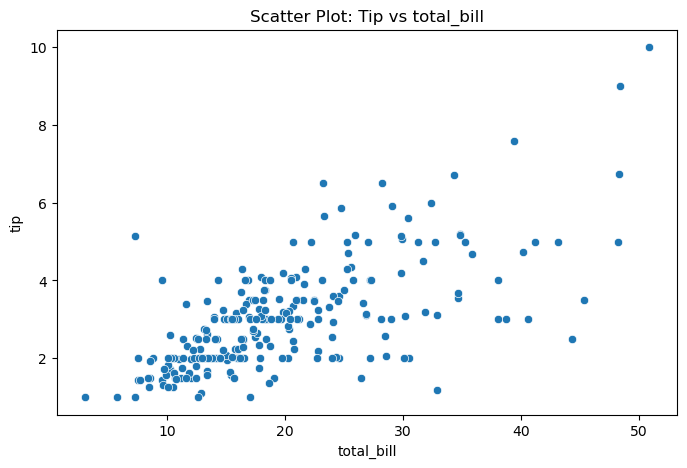

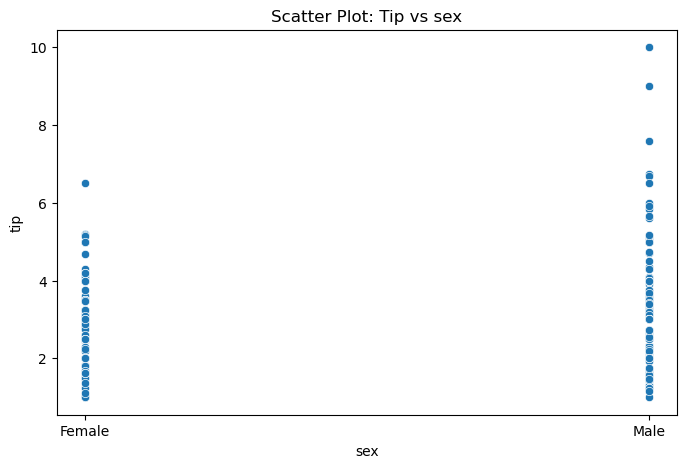

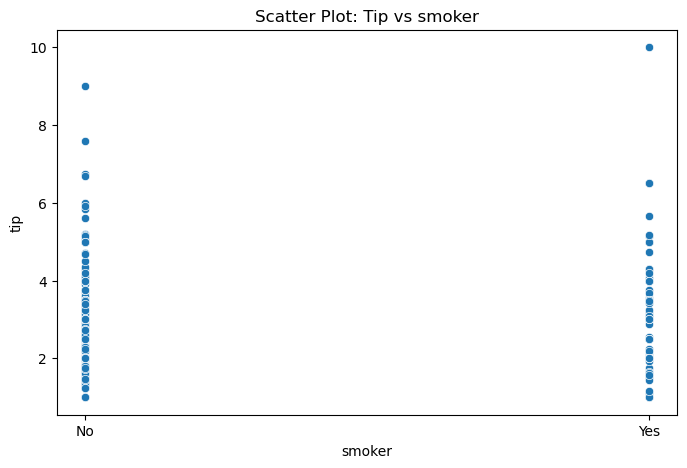

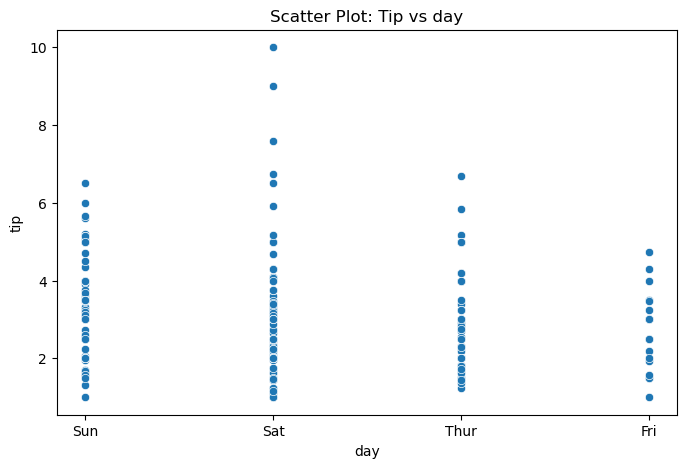

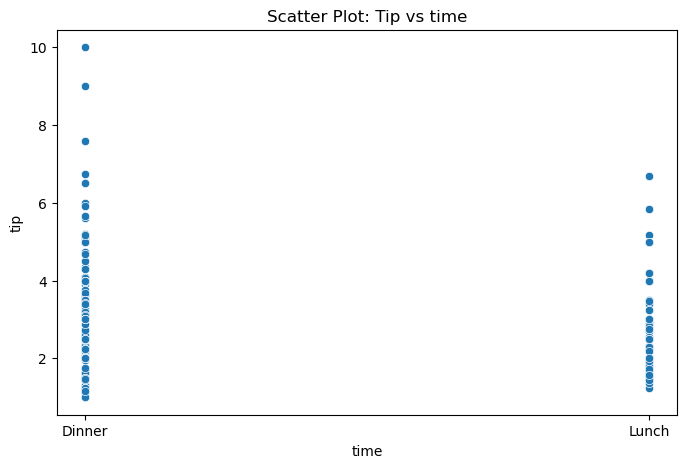

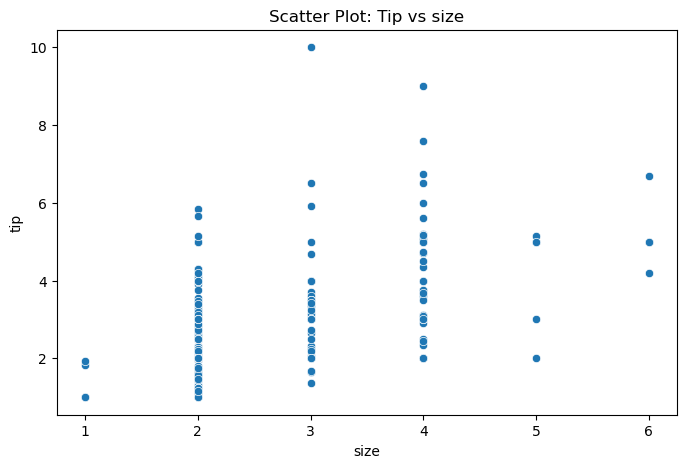

In [35]:
# Scatter plots for potential predictors
predictors = ['total_bill','sex', 'smoker', 'day', 'time', 'size']  

for predictor in predictors:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data, x=predictor, y='tip')
    plt.title(f'Scatter Plot: Tip vs {predictor}')
    plt.show()

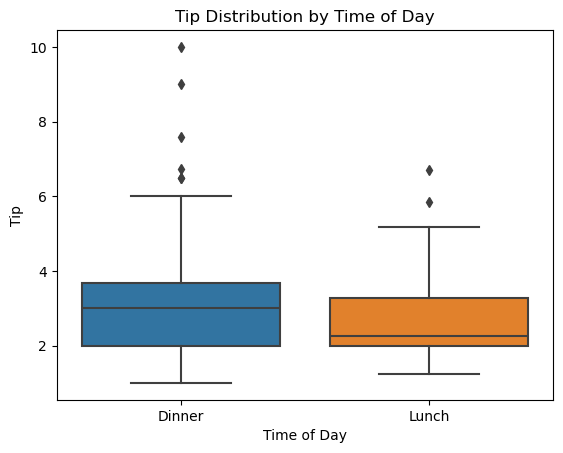

In [36]:

sns.boxplot(data=data, x='time', y='tip')
plt.title('Tip Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Tip')
plt.show()

### Conclusion:

There are more outliers during dinner which shows that generous tipping is done during dinner than in lunch.
-> This could be because the dinner is usually non hectic and a time to spend time with family which lightens the mood of customers. Therefore, more variety and more provisions should be enabled during dinner.

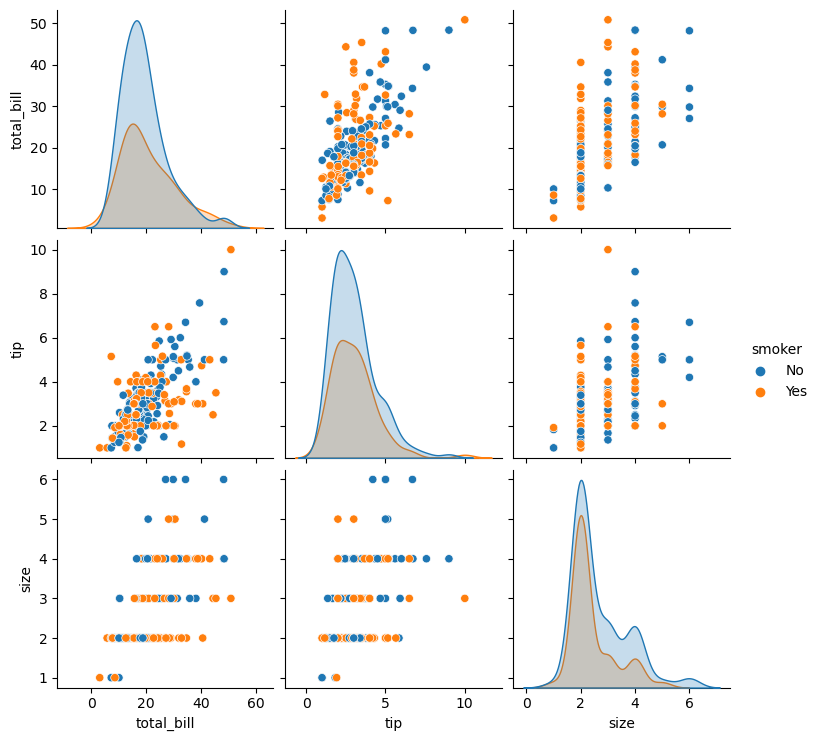

In [37]:
sns.pairplot(data, vars=['total_bill', 'tip', 'size'], hue='smoker')
plt.show()

#### Observations:

As the total bill increases, tips tend to increase.
Both groups show similar tipping behaviour although for smokers it is more wide spread.

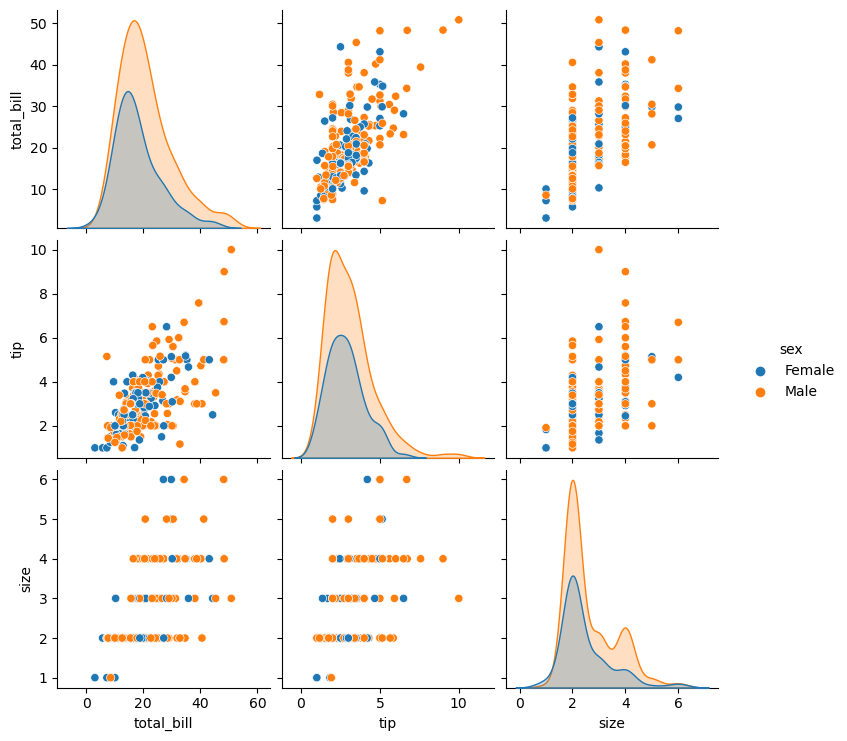

In [38]:
sns.pairplot(data, vars=['total_bill', 'tip', 'size'], hue='sex')
plt.show()

#### Observations:

Here also, positive relationship which means higher bill generally means more tipping.
Show similar trends though variability for male customers seems to be more.

#### Rainbow test

In [39]:
from statsmodels.stats.diagnostic import linear_rainbow
X = data[['total_bill', 'size']]  # Adjust based on relevant predictors
y = data['tip']
X = sm.add_constant(X)

# Fit a simple linear regression model
model = sm.OLS(y, X).fit()
rainbow_stat, rainbow_p_val = linear_rainbow(model)

print(f"Rainbow Test Statistic: {rainbow_stat}, p-value: {rainbow_p_val}")

Rainbow Test Statistic: 1.190265664683282, p-value: 0.17048935693447384


In [40]:

X = data[['total_bill', 'size']].values  # Features (predictors)
y = data['tip'].values                   # Target (tip amount)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
     

In [42]:

# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, lr_preds)))
print("Linear Regression R^2:", r2_score(y_test, lr_preds))

# 2. Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_preds = ridge_model.predict(X_test)
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, ridge_preds)))
print("Ridge R^2:", r2_score(y_test, ridge_preds))

# 3. Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_preds = lasso_model.predict(X_test)
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, lasso_preds)))
print("Lasso R^2:", r2_score(y_test, lasso_preds))

# 4. Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, dt_preds)))
print("Decision Tree R^2:", r2_score(y_test, dt_preds))

# 5. Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))
print("Random Forest R^2:", r2_score(y_test, rf_preds))

# 6. Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_preds = svr_model.predict(X_test)
print("SVR RMSE:", np.sqrt(mean_squared_error(y_test, svr_preds)))
print("SVR R^2:", r2_score(y_test, svr_preds))

# 7. K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)
print("KNN RMSE:", np.sqrt(mean_squared_error(y_test, knn_preds)))
print("KNN R^2:", r2_score(y_test, knn_preds))

Linear Regression RMSE: 0.8053568271607012
Linear Regression R^2: 0.4811084097989491
Ridge RMSE: 0.8047555882326722
Ridge R^2: 0.48188287736278435
Lasso RMSE: 0.768669542129225
Lasso R^2: 0.5273068720881755
Decision Tree RMSE: 1.0023492812551187
Decision Tree R^2: 0.1962183089778119
Random Forest RMSE: 0.9130701340560955
Random Forest R^2: 0.3330270546935905
SVR RMSE: 0.7312707732002564
SVR R^2: 0.5721846378644853
KNN RMSE: 0.8623563352695867
KNN R^2: 0.4050596025324963


#### Observation:

here we can see than SVR gives best accuracy
since SVR has the lowest RMSE (0.7313) and the highest R² (0.5722), indicating it performs the best in terms of predictive accuracy and model fit.

### Residual Plot

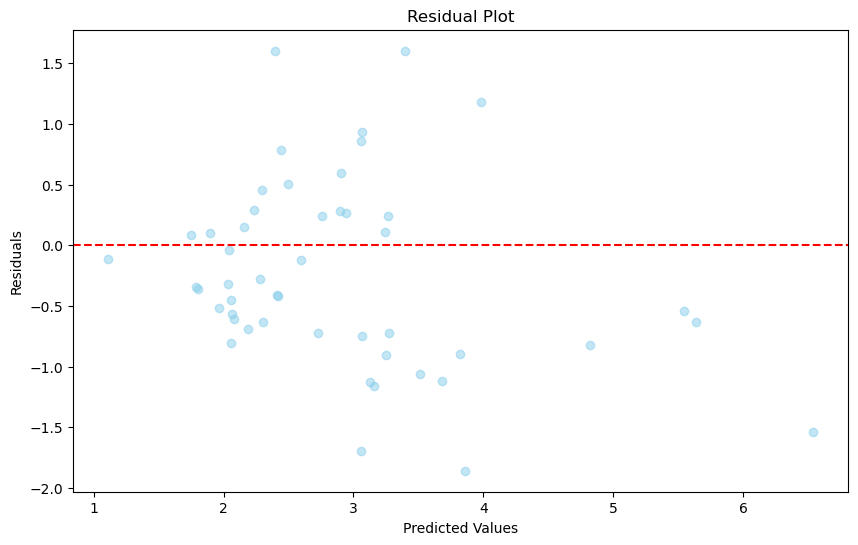

In [50]:
import matplotlib.pyplot as plt
y_pred = lr_preds
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='skyblue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

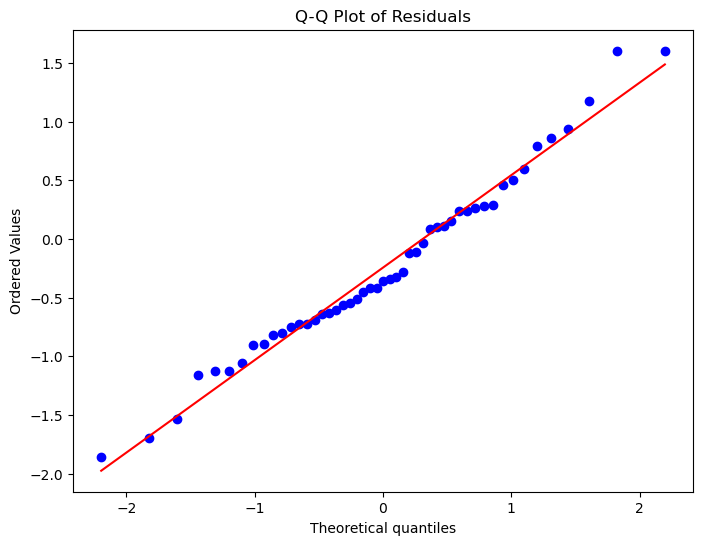

In [51]:
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

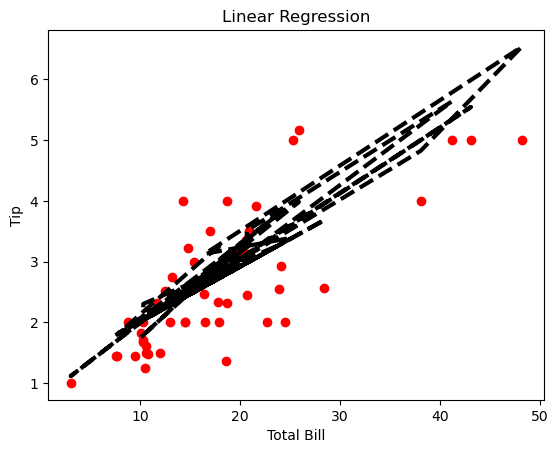

In [58]:
plt.scatter(X_test[:, 0], y_test, color='red') 

# Here, we are using Linear Regression (lr_model)
lr_model = LinearRegression()  
lr_model.fit(X_train, y_train)  
y_pred = lr_model.predict(X_test)


plt.plot(X_test[:, 0], y_pred, color='black', linewidth=3, linestyle='--')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Linear Regression')
plt.show()

#### Observations:

The plot shows positive trend : as the total_bill increases, the tip generally increases as well.

This is in line with the expectation that customers tend to tip more on larger bills, following either a percentage-based tipping approach or a higher fixed tip for larger meals.

Lasso is close.

#### Hypertuning

In [55]:
#Hypertuning

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5, 0.3, 0.01],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
}

svr = SVR(kernel='rbf')
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best RMSE (negative MSE):", -grid_search.best_score_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END ....................C=0.1, epsilon=0.1, gamma=scale; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.1, gamma=scale; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.1, gamma=scale; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.1, gamma=scale; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.1, gamma=scale; total time=   0.0s
[CV] END .....................C=0.1, epsilon=0.1, gamma=auto; total time=   0.0s
[CV] END .....................C=0.1, epsilon=0.1, gamma=auto; total time=   0.0s
[CV] END .....................C=0.1, epsilon=0.1, gamma=auto; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.1, gamma=0.001; total time=   0.0s
[CV] END .....................C=0.1, epsilon=0.1, gamma=auto; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.1, gamma=0.001; total time=   0.0s
[CV] END .....................C=0.1, epsilon=0

In [62]:

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_svr = svr_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

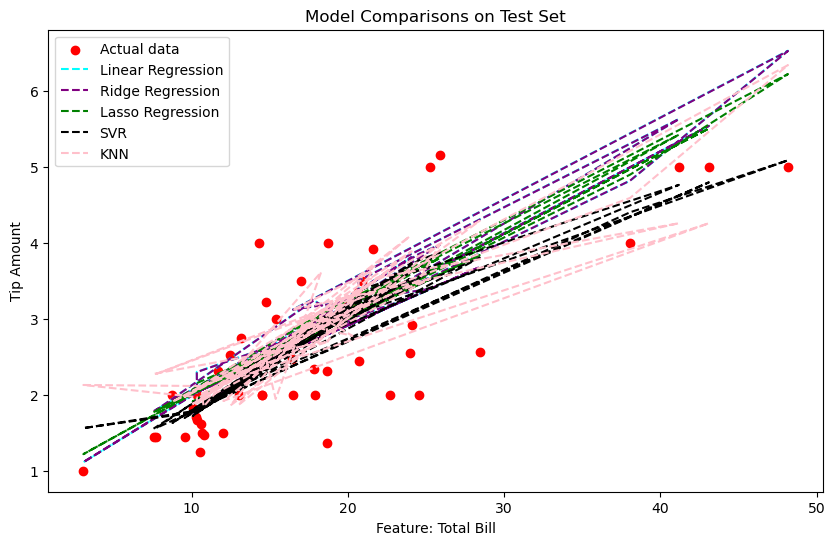

In [64]:
plt.figure(figsize=(10, 6))

plt.scatter(X_test[:, 0], y_test, color='red', label='Actual data')  # Plot the true values


plt.plot(X_test[:, 0], y_pred_linear, color='cyan', label='Linear Regression', linestyle='--')
plt.plot(X_test[:, 0], y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X_test[:, 0], y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')

plt.plot(X_test[:, 0], y_pred_svr, color='black', label='SVR', linestyle='--')
plt.plot(X_test[:, 0], y_pred_knn, color='pink', label='KNN', linestyle='--')

# Plotting 
plt.title('Model Comparisons on Test Set')

plt.xlabel('Feature: Total Bill') # Total Bill for X-axis
plt.ylabel('Tip Amount')  # Y-axis label for tip
plt.legend()
plt.show()
     

## Conclusions:


1. Best Fit: Linear Regression (cyan) and Ridge Regression (purple) follow the trend of the actual data (red dots) pretty closely, making them likely good choices for predicting tips.

2. Positive Relationship: All models show that as the total bill increases, the tip amount generally increases too.

3. Outliers: There are some points where the actual data is quite far from the model predictions. No model fits these unusual points well.

4. Model Differences: Some models, like KNN (gray) and SVR (yellow), don't match the data trend as closely as Linear and Ridge Regression.

5. Overall Recommendation: Linear and Ridge Regression look like the best options among the models shown here.